In [62]:
import os
import pandas as pd
import numpy  as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

2.7.0


In [63]:
xData  = pd.read_csv('/Users/sventur/WORKSPACE/ROMNet/Data/PSR_10Cases/10PC/train/pts/Input.csv')
x      = xData.to_numpy()
x[:,0] = np.log10(x[:,0] + 1.e-15)

yData  = pd.read_csv('/Users/sventur/WORKSPACE/ROMNet/Data/PSR_10Cases/10PC/train/pts/Output.csv')
y      = yData.to_numpy()
y      = y[:,4]

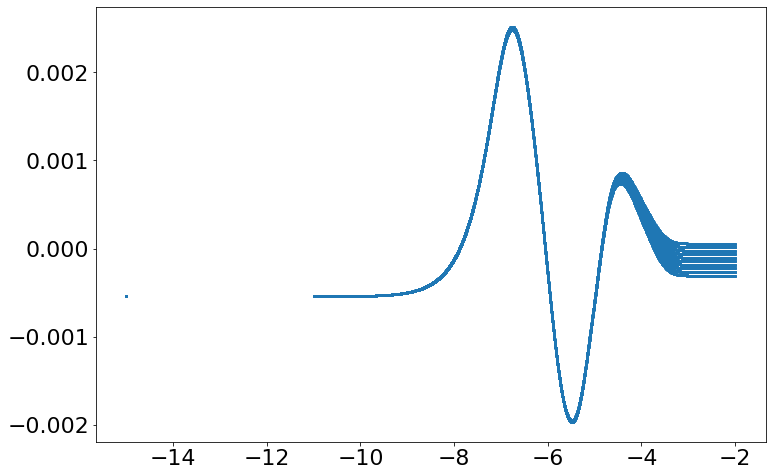

In [64]:
fig = plt.figure(figsize=(12,8))
plt.plot(x[:,0], y, 'o', markersize=2)

In [65]:
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

#model.summary()

history = model.fit(x, y, validation_split=0.2, verbose=1, epochs=100)

Epoch 1/100
600/600 [==============================] - 1s 886us/step - loss: 0.0196 - val_loss: 0.0126
Epoch 2/100
600/600 [==============================] - 0s 775us/step - loss: 0.0145 - val_loss: 0.0079
Epoch 3/100
600/600 [==============================] - 0s 774us/step - loss: 0.0133 - val_loss: 0.0090
Epoch 4/100
600/600 [==============================] - 0s 795us/step - loss: 0.0123 - val_loss: 0.0040
Epoch 5/100
600/600 [==============================] - 1s 909us/step - loss: 0.0123 - val_loss: 0.0031
Epoch 6/100
600/600 [==============================] - 0s 786us/step - loss: 0.0102 - val_loss: 0.0022
Epoch 7/100
600/600 [==============================] - 0s 780us/step - loss: 0.0109 - val_loss: 0.0084
Epoch 8/100
600/600 [==============================] - 0s 770us/step - loss: 0.0105 - val_loss: 0.0060
Epoch 9/100
600/600 [==============================] - 0s 776us/step - loss: 0.0083 - val_loss: 0.0044
Epoch 10/100
600/600 [==============================] - 0s 771us/step - l

600/600 [==============================] - 0s 806us/step - loss: 1.1324e-04 - val_loss: 7.1099e-05
Epoch 78/100
600/600 [==============================] - 1s 836us/step - loss: 1.2682e-04 - val_loss: 2.0905e-04
Epoch 79/100
600/600 [==============================] - 0s 779us/step - loss: 1.3341e-04 - val_loss: 9.9757e-05
Epoch 80/100
600/600 [==============================] - 0s 770us/step - loss: 1.3398e-04 - val_loss: 1.5745e-04
Epoch 81/100
600/600 [==============================] - 0s 792us/step - loss: 1.1063e-04 - val_loss: 1.5409e-04
Epoch 82/100
600/600 [==============================] - 0s 790us/step - loss: 1.0951e-04 - val_loss: 5.7586e-05
Epoch 83/100
600/600 [==============================] - 1s 984us/step - loss: 1.0844e-04 - val_loss: 6.6921e-05
Epoch 84/100
600/600 [==============================] - 0s 773us/step - loss: 1.1661e-04 - val_loss: 1.1989e-04
Epoch 85/100
600/600 [==============================] - 0s 811us/step - loss: 1.1765e-04 - val_loss: 1.0832e-04
Epoch

In [66]:
y_pred = model.predict(x)

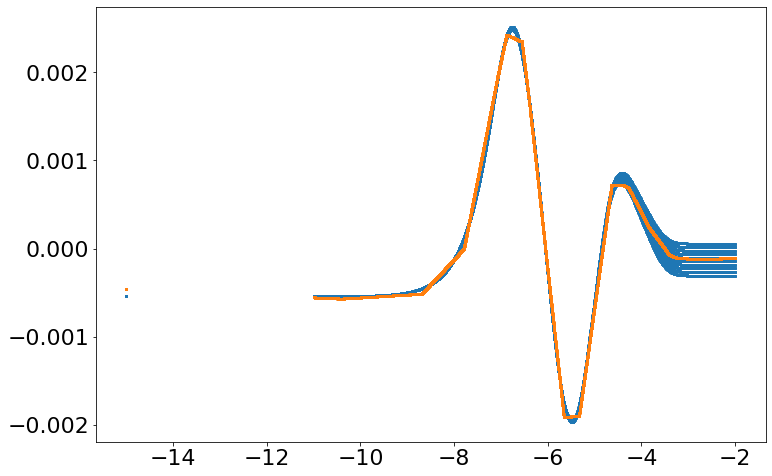

In [67]:
fig = plt.figure(figsize=(12,8))
plt.plot(x[:,0], y, 'o', markersize=2)
plt.plot(x[:,0], y_pred, 'o', markersize=2)